# Assignment 1 - LDSA

## Part I: Intro to HDFS/Hadoop and Wordcount

### Task 1.1

1. **Question** - *Look at the contents of the folder “output” - what are the files placed in there? What do they mean?*  
**Answer** - The files created in the output folder are “part-r-00000” and “_SUCCESS”. The first file contains the result of the word count performed on the input file used, and the other file is an empty file that simply specifies that the run of the word count application was successful. 

2. **Question** - *In this example we used Hadoop in “Local (Standalone) Mode”. What is the difference between this mode and the Pseudo-distributed mode?*   
**Answer** - The local (standalone) mode is the default for Hadoop and it runs in a non-distributed mode, which means that it runs as a single java process. The pseudo-distributed mode means that each Hadoop daemon runs in a separate Java process.

### Task 1.2

1. **Question** - *What are the roles of the files core-site.xml and hdfs-site.xml?*  
**Answer** - The core-site.xml file stores the specific configuration settings for the Hadoop Core, such as where the I/O settings for NameNodes host and port. The hdfs-site.xml file contains the configuration settings for HDFS daemons; the NameNode, the Secondary NameNode, and the DataNodes. 

2. **Question** - *Describe briefly the roles of the different services listed when executing ‘jps’.*  
**Answer** - The NameNode is the master node of the hadoop cluster and is considered the primary node for the hdfs cluster with the purpose of storing the metadata information. The DataNodes are the slave nodes of the hdfs cluster, and the work performed by each one of these datanodes is based on the instructions in the namenode. The datanodes are used to store, retrieve and process data, and report back to the namenode periodically. The SecondaryNameNode is used to merge the FSImage and editlog periodically to prevent the edit log from becoming very large

### Task 1.3

1. **Question** - *Explain the roles of the different classes in the file WordCount.java.*   
**Answer** - First the constructor for the class is created by the line “public class WordCount {“. WordCount then has three nested classes, the Driver class (“public void static main”), the Map class (“public static class Map extends MapReduceBase implements Mapper<LongWritable, Text, Text, IntWritable>”),  and the Reduce class (“public static class Reduce extends MapReduceBase implements Reducer<Text, IntWritable, Text, IntWritable>”). The Driver class sets up the configuration of the input and output data formats, specifies the types of intermediate data produced etc. The Driver then submits the job to the Hadoop cluster to be executed there. The Map class performs the Mapping function, taking a set of data as input and converts it into another data type known as <Key, Value> pairs. The Reducer class performs the Reduce function, which takes the output of the Map function as the input and combines the values with the same key. 

### Task 1.4 

1. **Question** - *Describe the role of Combiners in MapReduce and Modify the code from Task1 so that it uses a Combiner.*  
**Answer** - The Combiners in MapReduce are used to perform a local reduce on the output on one mapper before the output is sent to the reducer stage. This reduces the memory/disk requirement of the map tasks and thus minimizing the volume of data transfer between between map and reduce tasks.


In [16]:
%matplotlib inline

       1
0       
a  10170
b   4860
c   4298
d   2743
e   3491
f   4130
g   1770
h   3106
i   8685
j    344
k    465
l   2689
m   4819
n   2062
o   9720
p   3880
q    173
r   2504
s   7411
t  18600
u   1110
v    935
w   5886
x     32
y    479
z     55


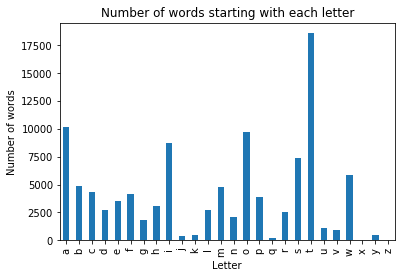

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnds

lettercount = pnds.read_table('part-00000', header=None, index_col=0)
print(lettercount)
plot = lettercount.plot(title='Number of words starting with each letter', kind='bar', legend=None)
plot.set_xlabel("Letter")
plot.set_ylabel("Number of words")
plt.savefig('lettercount.png')
plt.show()

## Part II: Analyzing twitter data using Hadoop streaming and Python

1. **Question** - *Based on the documentation in the above link, how would you classify the JSON-formatted tweets? Structured, semi-structured or unstructured data? What could be the challenges of using traditional row-based RDBMs to store and analyze this dataset (apart from the possibility of very large datasets)?*  
**Answer** - 

In [1]:
%matplotlib inline

             0
den    1129512
han     635025
det     417767
hon     290480
hen      25610
denna    21038
denne     3693


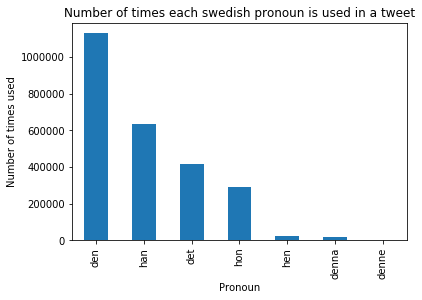

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnds
import csv

with open('twitter-results', mode='r') as infile:
    reader = csv.reader(infile, delimiter='\t')
    wordcount = {}
    for row in reader:
        k, v = row
        v = int(v)
        # Check if the key is already in our output dict
        if k in wordcount.keys():
            wordcount[k] += v
        # If not, create it
        else:
            wordcount[k] = v
    twitter_wordcount = pnds.DataFrame.from_dict(wordcount, 'index')
    twitter_wordcount = twitter_wordcount.sort_values([0], ascending=False)
    print(twitter_wordcount)
    plot = twitter_wordcount.plot(title='Number of times each swedish pronoun is used in a tweet', kind='bar', legend=None)
    plot.set_xlabel("Pronoun")
    plot.set_ylabel("Number of times used")
    plt.savefig('twitter_wordcount.png')
    plt.show()